In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importing dataset
dataset = pd.read_csv('C:/Users/vaibh/Desktop/360 Digitmg/Decision Tree/Assignment/HR_DT.csv')

In [3]:
# Checing rows and columns in the dataset
dataset.head()

,Position of the employee,no of Years of Experience of employee,monthly income of employee
0,Business Analyst,1.1,39343
1,Junior Consultant,1.3,46205
2,Senior Consultant,1.5,37731
3,Manager,2.0,43525
4,Country Manager,2.2,39891


In [4]:
# Checking dmensions of the dataset
dataset.shape

(196, 3)

In [5]:
# Changing column titles
dataset = dataset.rename(columns={'Position of the employee':'Position',
                        'no of Years of Experience of employee':'Experience',
                       ' monthly income of employee':'Monthly_Income'})

In [6]:
# Checking for null values
dataset.isnull().sum()

Position          0
Experience        0
Monthly_Income    0
dtype: int64

There are no null values

In [7]:
# Checking for duplicate values
dataset.duplicated().sum()

38

There are 38 duplicated values

In [8]:
# Droppinf duplicated values
dataset = dataset.drop_duplicates(ignore_index=True)

In [9]:
dataset.shape

(158, 3)

In [10]:
# Checking datatypes of the features
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Position        158 non-null    object 
 1   Experience      158 non-null    float64
 2   Monthly_Income  158 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 3.8+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

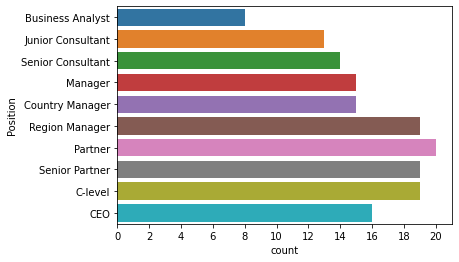

In [11]:
# Countplot for number of positions in the dataset
sns.countplot(y = dataset.Position)
plt.xticks(range(0,21,2))
plt.show

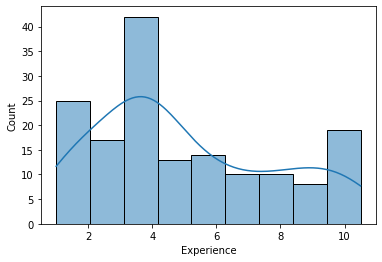

<AxesSubplot:xlabel='Monthly_Income', ylabel='Count'>

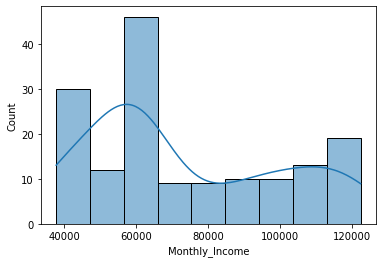

In [12]:
# Histplot of numerical features
sns.histplot(dataset.Experience,kde=1);plt.show()
sns.histplot(dataset.Monthly_Income,kde=1)

<AxesSubplot:xlabel='Monthly_Income', ylabel='Experience'>

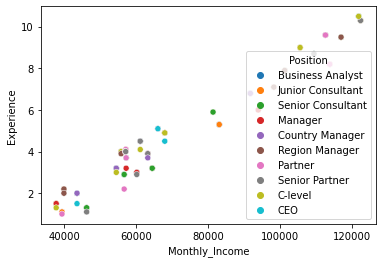

In [13]:
# Scatterplot
sns.scatterplot(y = dataset.Experience,x = dataset.Monthly_Income, hue=dataset.Position)

Monthly income and Experience are positively correlated

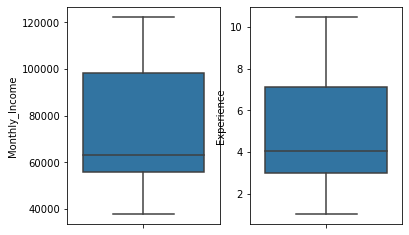

In [14]:
# Boxplot
plt.subplots(1,2)
sns.boxplot(y = dataset.Experience);plt.subplot(1,2,1);
sns.boxplot(y = dataset.Monthly_Income);plt.subplot(1,2,2);

There are no outliers present in the dataset.

In [15]:
# Converting categorical data to numerical data
dataset = pd.get_dummies(data = dataset, columns = ['Position'],drop_first=True)

In [16]:
# Splitting into independent and dependent features
x = dataset.loc[:,dataset.columns != 'Monthly_Income']
y = dataset.Monthly_Income

In [17]:
# Train-Test split
from sklearn.model_selection import train_test_split
x_train_o, x_test_o, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [18]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train_o)
x_test = scaler.transform(x_test_o)

In [19]:
# Using Decision Tree

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(criterion='squared_error', max_depth=2)
dt_train = dt.fit(x_train,y_train)  # fitting model to train data

In [20]:
# Predicting results for test data
yhat_test = dt.predict(x_test)

In [21]:
# MSE and R2 Score for test data
from sklearn.metrics import mean_squared_error,r2_score

test_mse = mean_squared_error(y_test,yhat_test)
test_r2score = r2_score(y_test,yhat_test)
print(f'Test MSE: {test_mse} R2_score: {test_r2score}') 

Test MSE: 24001796.314989932 R2_score: 0.9711762114836251


In [22]:
# MSE and R2 Score for train data

yhat_train = dt.predict(x_train)
train_mse = mean_squared_error(y_train,yhat_train)
train_r2score = r2_score(y_train,yhat_train)
print(f'Train MSE: {train_mse} R2_score: {train_r2score}' ) 

Train MSE: 27494182.735353697 R2_score: 0.9594886550752851


Pruning the decision tree using max_depth= 2, so as to avoid overfitting. 

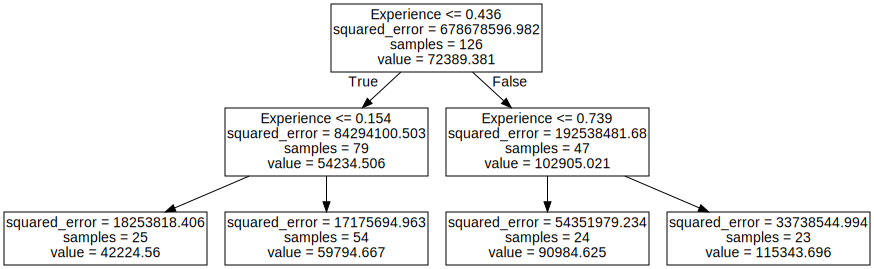

<Figure size 360x144 with 0 Axes>

In [23]:
import graphviz 
import sklearn

plt.figure(figsize=(5,2))
dt = DecisionTreeRegressor(criterion='squared_error',max_depth=2).fit(x_train, y_train)
dot_data = sklearn.tree.export_graphviz(dt,feature_names = x.columns.tolist())
graph = graphviz.Source(dot_data)
graph 

Using Random Forest to see if we can increase the accuracy 

In [52]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators=100, random_state=0)
clf.fit(x_train,y_train) # Fitting random forest model to train 
clf_yhat_test = clf.predict(x_test)

In [53]:
# MSE and R2 Score for test data

clf_test_mse = mean_squared_error(y_test,clf_yhat_test)
clf_test_r2score = r2_score(y_test,yhat_test)
print(f'Test MSE: {clf_test_mse} R2_score: {clf_test_r2score}') 

Test MSE: 8175689.758013977 R2_score: 0.9711762114836251


In [54]:
# MSE and R2 Score for train data

clf_yhat_train = dt.predict(x_train)
clf_train_mse = mean_squared_error(y_train,clf_yhat_train)
clf_train_r2score = r2_score(y_train,clf_yhat_train)
print(f'Train MSE: {clf_train_mse} R2_score: {clf_train_r2score}')  

Train MSE: 27494182.735353697 R2_score: 0.9594886550752851


Using Random Forest and Decision Tree Regressor we get the same r2Score of 0.97
Either of the model can be used to verify candidates claim.